# PHYS 362 - Random Walk

## Part 1: Simple RW

In [1]:
import os
import numpy as np
from random import randint
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit as opt
sns.set_style('white')

We will make a random walk. For this we need to impose a few parameters:

In [2]:
times = 10**6 # set the amount of steps - we will add to this later on, but this is a good starting point
t = np.linspace(0, times, times) # times - we set a timestep of 1

Define a few functions to be used in the first part:

In [186]:
# now do the random walk for \pm 1
def simple_random_walk_1d(t):
    x = [0] # we will fill x up with +/- 1
    for i in range(1,len(t)):
        rand = randint(0,1)
        if rand == 0:
            x.append(x[i-1] - 1)
        elif rand == 1:
            x.append(x[i-1] + 1)
    return x

In [187]:
# plot the resulting path
def simple_plot(t, x):
    plt.figure()
    plt.title(r'1-Dimensional Random Walk with Step Size of $\pm 1$')
    plt.plot(t, x, label='Position')
    plt.xlabel('Time (steps of 1)')
    plt.ylabel('Position')
    plt.show()
    return

Do the random walk:

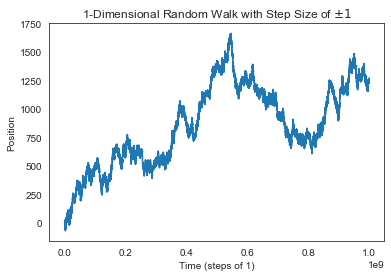

In [247]:
z = simple_random_walk_1d(1000*t)
simple_plot(1000*t, z)

Calculate the Root-Mean-Square:

In [10]:
# We now want to calculate the rms value as a function of x
# we will run a loop and append the values at each instance
def root_mean_square(position):
    rms = [0] # make a blank list
    summation = 0 # initialize the summation
    sqx = np.power(position,2) # make an array of squares of x
    for i in range(1, len(position)): # loop over all elements
        summation += sqx[i] # sum them up
        argument = summation/len(sqx[:i]) # divide by N
        rms.append(np.sqrt(argument)) # add the square root of that sum to the rms
    print('Root mean square values calculated')
    return rms

In [248]:
rms_z = root_mean_square(z)

Root mean square values calculated


Define some functions to be used generally:

In [249]:
def rms_fit(t, D):
    return np.sqrt(2*D*t)

In [250]:
def curve_fit(time, rms, rms_fit, D0):
    D = opt(rms_fit, time, rms, p0=D0)
    return D

In [251]:
def num_d_fit(t, rms, rms_fit, D_ana):
    best_D_z = curve_fit(t, rms, rms_fit, D_ana)
    D_num = best_D_z[0]
    print(D_num)
    return D_num

Get proportionality constant:

In [263]:
D_num_1 = num_d_fit(t, rms_z, rms_fit, 1)

[0.47023933]


Plot the results:

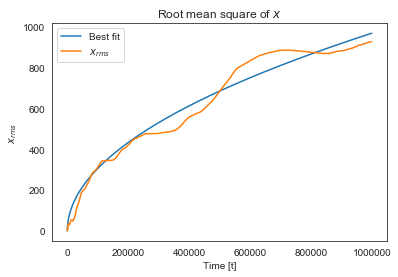

In [266]:
# plot
plt.figure()
plt.title(r'Root mean square of $x$')
plt.ylabel(r'$x_{rms}$')
plt.xlabel('Time [t]')
#plt.plot(t, np.sqrt(t))
plt.plot(t, rms_fit(t, D_num_1), label='Best fit') # show that it follows analytical behaviour
plt.plot(t, rms_z, label='$x_{rms}$')
plt.legend(loc='upper left')
plt.show()

Clearly, we see that the Root-Mean-Square of x is approximately prorportional to $\sqrt(2Dt)$, with D being:

In [269]:
print('D = %1.3f' %D_num_1)

D = 0.470


BACK TO WRITTEN ASSIGNMENT 1.a) for discussion

## Part 2: More Complicated

In [197]:
# we will use about the same time parameters
y = [0]
for i in range(1, len(100*t)):
    rand = randint(0,3) # create four random params
    if rand == 0: # if 0, -2
        y.append(y[i-1] - 2)
    elif rand == 1: # if 1, -1
        y.append(y[i-1] - 1)
    elif rand == 2: # if 2, +1
        y.append(y[i-1] + 1)
    elif rand == 3: # if 3, +2
        y.append(y[i-1] +2)

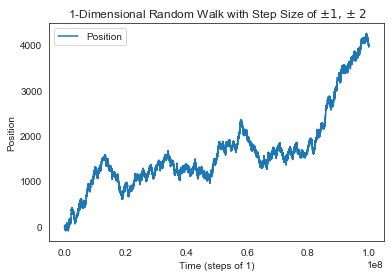

In [198]:
# plot the resulting walk
plt.figure()
plt.title(r'1-Dimensional Random Walk with Step Size of $\pm 1,\pm 2$')
plt.ylabel('Position')
plt.xlabel('Time (steps of 1)')
plt.plot(100*t, y, label='Position')
plt.legend(loc='upper left')
plt.show()

In [199]:
rms_part_2 = root_mean_square(y)

Root mean square values calculated


In [254]:
D_num2 = num_d_fit(t, rms_part_2, rms_fit, 5/4)

[1.37169799]


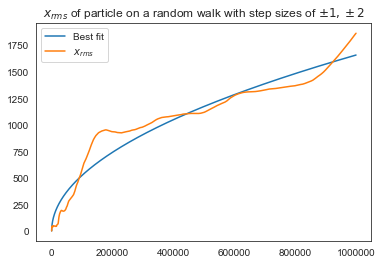

In [203]:
plt.figure()
plt.title('$x_{rms}$ of particle on a random walk with step sizes of $\pm 1, \pm 2$')
plt.plot(t, rms_fit(t, D_num_2), label='Best fit')
plt.plot(t, rms_part_2, label='$x_{rms}$')
plt.legend(loc='upper left')
plt.show()

Once again, we see that the rms is proportional to $\sqrt(2Dt)$, this time with D being larger, at:

In [268]:
print('D = %1.3f' %D_num_2)

D = 1.372


BACK TO ASSIGNMENT 1.b) for discussion